In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# About the dataset*
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Let's download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.**

In [3]:
df = pd.read_csv(r"E:\Intellipaat Class\Machine Learning\Case Study\KNN\teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.shape

(1000, 12)

In [7]:
df.isnull().any()

region     False
tenure     False
age        False
marital    False
address    False
income     False
ed         False
employ     False
retire     False
gender     False
reside     False
custcat    False
dtype: bool

In [8]:
df.duplicated().sum()

0

In [11]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


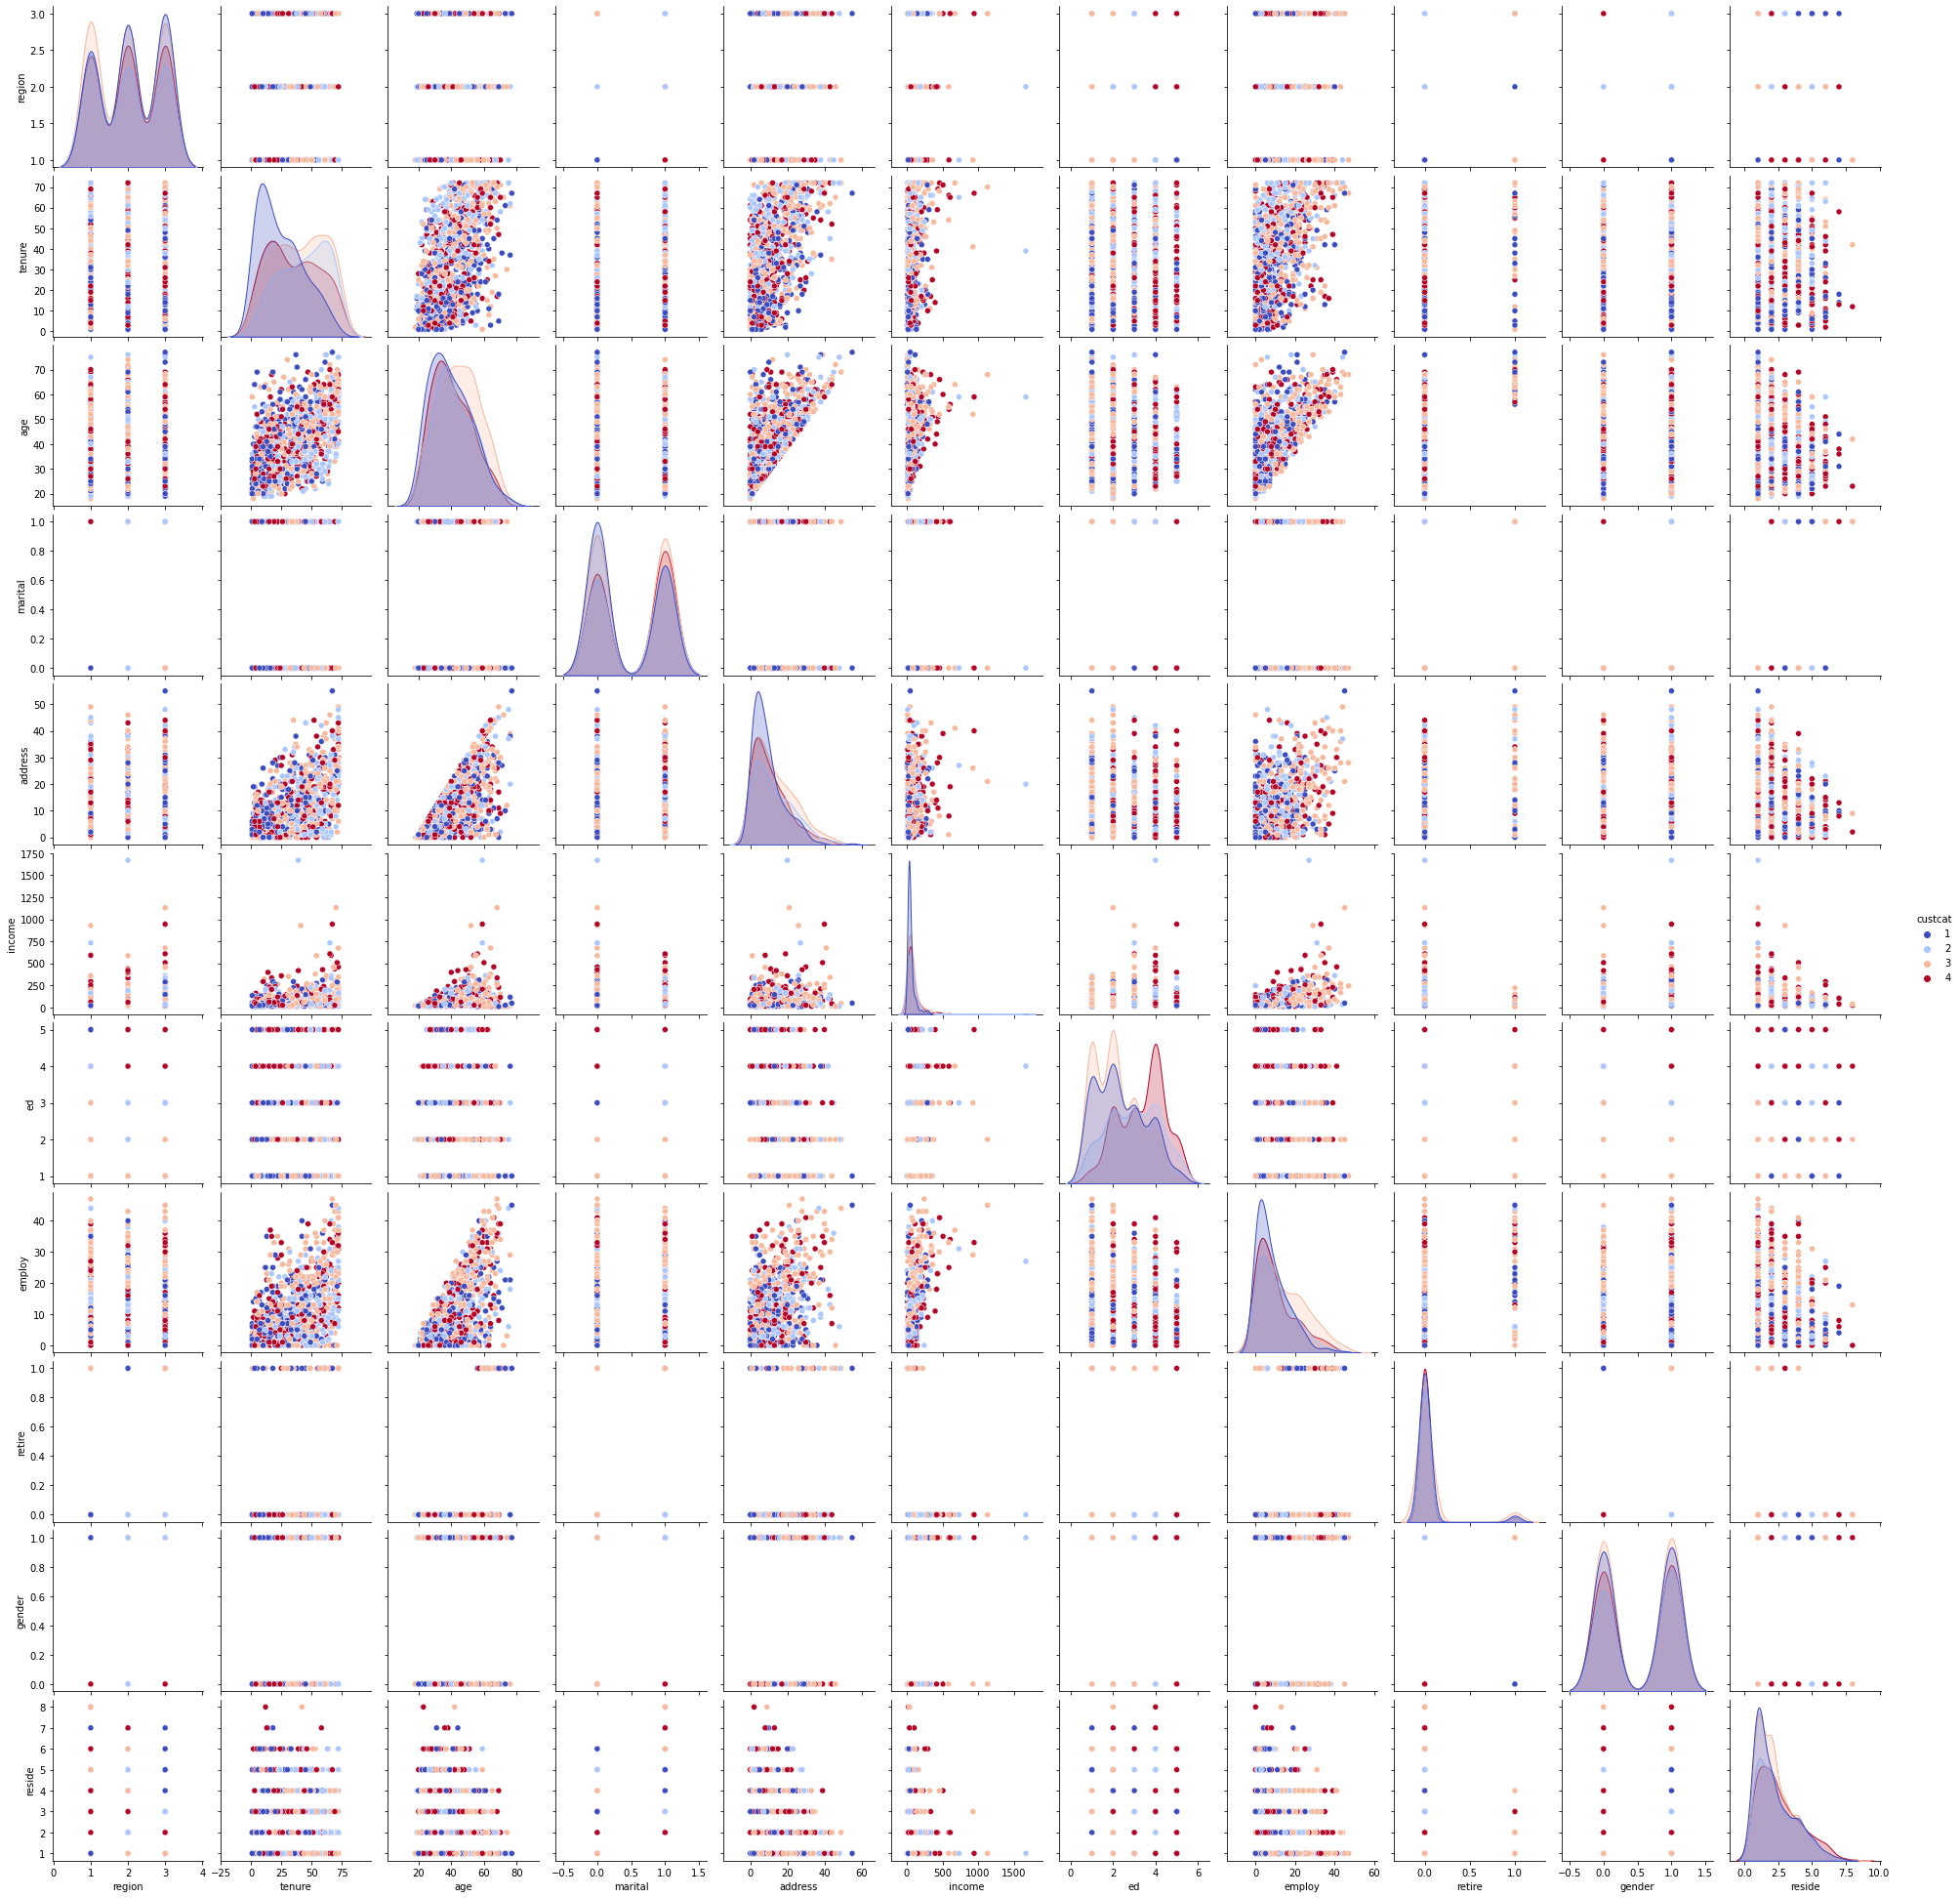

In [61]:
sns.pairplot(df,hue='custcat',palette='coolwarm')

In [15]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


<AxesSubplot:>

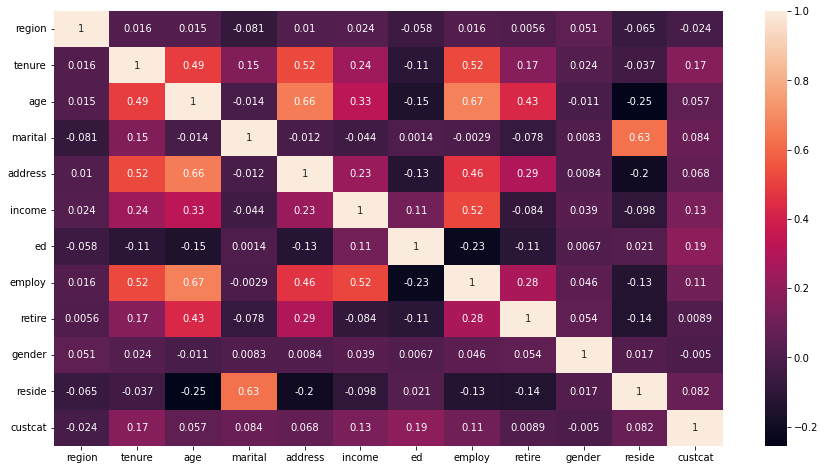

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [19]:
X = df.drop(['custcat'], axis=1)
y = df.custcat

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
sc.fit(X)

StandardScaler()

In [22]:
X = sc.transform(X)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
accuracy_score(y_test, y_pred)

0.33

In [38]:
KNN =KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.29

In [49]:
for i in range(1,40,2):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print(f'The accuracy for the K={i} is {accuracy_score(y_test, y_pred)}')

The accuracy for the K=1 is 0.29
The accuracy for the K=3 is 0.32666666666666666
The accuracy for the K=5 is 0.33
The accuracy for the K=7 is 0.36
The accuracy for the K=9 is 0.33666666666666667
The accuracy for the K=11 is 0.36
The accuracy for the K=13 is 0.37666666666666665
The accuracy for the K=15 is 0.38333333333333336
The accuracy for the K=17 is 0.38666666666666666
The accuracy for the K=19 is 0.35333333333333333
The accuracy for the K=21 is 0.36
The accuracy for the K=23 is 0.33
The accuracy for the K=25 is 0.36
The accuracy for the K=27 is 0.3566666666666667
The accuracy for the K=29 is 0.36
The accuracy for the K=31 is 0.3566666666666667
The accuracy for the K=33 is 0.35333333333333333
The accuracy for the K=35 is 0.33666666666666667
The accuracy for the K=37 is 0.34
The accuracy for the K=39 is 0.3433333333333333


In [56]:
accuracy_rate = []
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(np.mean(pred_i == y_test))
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Accuracy Rate')

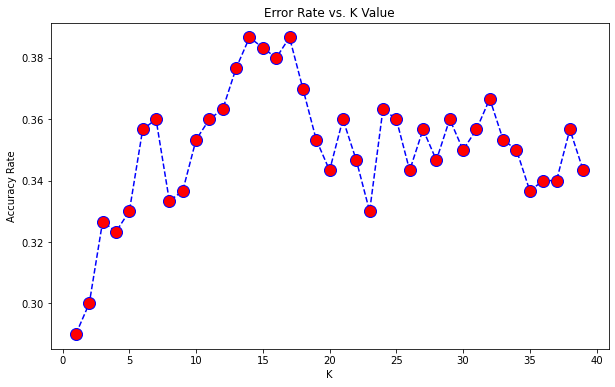

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

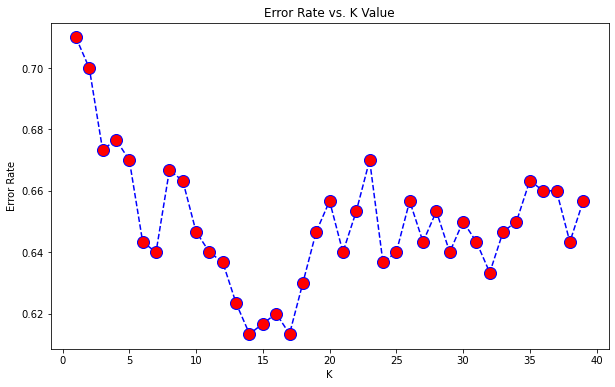

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


# Feature selection Techniques

# PCA

In [83]:
from sklearn.decomposition import PCA
# Perform feature selection using PCA
n_components = 4  # Select top 2 principal components
pca = PCA(n_components=n_components)
X_new = pca.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y , test_size=0.3, random_state=42)

In [85]:
for i in range(1,40,2):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print(f'The accuracy for the K={i} is {accuracy_score(y_test, y_pred)}')

The accuracy for the K=1 is 0.2733333333333333
The accuracy for the K=3 is 0.3333333333333333
The accuracy for the K=5 is 0.31333333333333335
The accuracy for the K=7 is 0.2966666666666667
The accuracy for the K=9 is 0.29333333333333333
The accuracy for the K=11 is 0.31
The accuracy for the K=13 is 0.32666666666666666
The accuracy for the K=15 is 0.31666666666666665
The accuracy for the K=17 is 0.33666666666666667
The accuracy for the K=19 is 0.36
The accuracy for the K=21 is 0.33
The accuracy for the K=23 is 0.35
The accuracy for the K=25 is 0.36
The accuracy for the K=27 is 0.35333333333333333
The accuracy for the K=29 is 0.38333333333333336
The accuracy for the K=31 is 0.36
The accuracy for the K=33 is 0.35333333333333333
The accuracy for the K=35 is 0.36
The accuracy for the K=37 is 0.36333333333333334
The accuracy for the K=39 is 0.36


# SequentialFeatureSelector

In [99]:
from sklearn.feature_selection import SequentialFeatureSelector
# Perform feature selection
f = 7  # Select top 2 features
sfs = SequentialFeatureSelector(KNeighborsClassifier(), n_features_to_select=f, direction='forward')
X_new1 = sfs.fit_transform(X, y)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, y , test_size=0.3, random_state=42)

In [101]:
for i in range(1,40,2):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print(f'The accuracy for the K={i} is {accuracy_score(y_test, y_pred)}')

The accuracy for the K=1 is 0.30666666666666664
The accuracy for the K=3 is 0.3566666666666667
The accuracy for the K=5 is 0.3566666666666667
The accuracy for the K=7 is 0.3566666666666667
The accuracy for the K=9 is 0.37
The accuracy for the K=11 is 0.3566666666666667
The accuracy for the K=13 is 0.3466666666666667
The accuracy for the K=15 is 0.34
The accuracy for the K=17 is 0.39
The accuracy for the K=19 is 0.39
The accuracy for the K=21 is 0.38666666666666666
The accuracy for the K=23 is 0.37333333333333335
The accuracy for the K=25 is 0.36333333333333334
The accuracy for the K=27 is 0.38
The accuracy for the K=29 is 0.37666666666666665
The accuracy for the K=31 is 0.38
The accuracy for the K=33 is 0.37666666666666665
The accuracy for the K=35 is 0.37333333333333335
The accuracy for the K=37 is 0.4033333333333333
The accuracy for the K=39 is 0.39


# L1 Regularization (Lasso)

In [103]:
from sklearn.linear_model import LassoCV
# Perform feature selection
lasso = LassoCV()
lasso.fit(X, y)
# Select features with non-zero coefficients
mask = lasso.coef_ != 0
X_new2 = X[:, mask]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_new2, y , test_size=0.3, random_state=42)

In [105]:
for i in range(1,40,2):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print(f'The accuracy for the K={i} is {accuracy_score(y_test, y_pred)}')

The accuracy for the K=1 is 0.31
The accuracy for the K=3 is 0.33
The accuracy for the K=5 is 0.30666666666666664
The accuracy for the K=7 is 0.33666666666666667
The accuracy for the K=9 is 0.37
The accuracy for the K=11 is 0.33
The accuracy for the K=13 is 0.3466666666666667
The accuracy for the K=15 is 0.33
The accuracy for the K=17 is 0.3333333333333333
The accuracy for the K=19 is 0.32666666666666666
The accuracy for the K=21 is 0.36333333333333334
The accuracy for the K=23 is 0.35
The accuracy for the K=25 is 0.35
The accuracy for the K=27 is 0.3433333333333333
The accuracy for the K=29 is 0.37
The accuracy for the K=31 is 0.3466666666666667
The accuracy for the K=33 is 0.36
The accuracy for the K=35 is 0.33666666666666667
The accuracy for the K=37 is 0.33666666666666667
The accuracy for the K=39 is 0.3433333333333333


# Tree-based Models:

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Perform feature selection
clf = RandomForestClassifier()
clf.fit(X, y)


RandomForestClassifier()

In [112]:
# Select features based on importance
sfm = SelectFromModel(clf, threshold=0.1, prefit=True)
X_new3 = sfm.transform(X)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_new3, y , test_size=0.3, random_state=42)

In [114]:
for i in range(1,40,2):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print(f'The accuracy for the K={i} is {accuracy_score(y_test, y_pred)}')

The accuracy for the K=1 is 0.24
The accuracy for the K=3 is 0.3
The accuracy for the K=5 is 0.30333333333333334
The accuracy for the K=7 is 0.31
The accuracy for the K=9 is 0.33
The accuracy for the K=11 is 0.3233333333333333
The accuracy for the K=13 is 0.3233333333333333
The accuracy for the K=15 is 0.33666666666666667
The accuracy for the K=17 is 0.34
The accuracy for the K=19 is 0.32666666666666666
The accuracy for the K=21 is 0.3466666666666667
The accuracy for the K=23 is 0.3333333333333333
The accuracy for the K=25 is 0.3333333333333333
The accuracy for the K=27 is 0.35333333333333333
The accuracy for the K=29 is 0.3466666666666667
The accuracy for the K=31 is 0.35
The accuracy for the K=33 is 0.35
The accuracy for the K=35 is 0.33666666666666667
The accuracy for the K=37 is 0.3466666666666667
The accuracy for the K=39 is 0.3433333333333333


I have tried with different feature selection techniques althought i able to got 40.33% in SequentialFeatureSelector 
technique when K=37 